# Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Futher Education (TAFE) institute in Queensland, Autralia. The TAFE survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

The goal of the project is to answer:
* Are employees who only worked for the institutes for a short of time resigning due to some kind of dissatisfation? What about employees who have been there longer
* Are younger employees resigning due to some kind of dissatisfaction? What about  older employees?

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  ...   Kept informed  Wellness programs  \
0  Permanent Full-time  ...               N                  N   
1  Permanent Full-time  ...               N                  N   
2  Permanent Full-time  ...               N                  N   
3  Permanent Full-time  ...               A                  N   
4  Permanent Full-time  ...               N                  A   

   Health & Safety  Gender          Age  Aboriginal  Torres Strait  South Sea  \
0                N    Male        56-60         NaN            NaN        NaN   
1                N    Male        56-60         NaN            NaN        NaN   
2                N    Male  61 or older         NaN            NaN        NaN   
3                A  Female        36-40         NaN            NaN        NaN   
4                M  Female  61 or older         NaN            NaN        NaN   

   Disability  NESB  
0         NaN   Yes  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  

[5 rows x 56 columns]

In [2]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

                                     ...                                     \
0                                    ...                                      
1                                    ...                                      
2                                    ...                                      
3                                    ...                                      
4                                    ...                                      

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            
3                                                Yes                                                            
4                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               
3                                                Yes                                               
4                                                Yes  

In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Drop the columns we know don't need for our analysis.

In [5]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  ...   Work life balance  Workload  None of the above  \
0  Permanent Full-time  ...               False     False               True   
1  Permanent Full-time  ...               False     False              False   
2  Permanent Full-time  ...               False     False               True   
3  Permanent Full-time  ...               False     False              False   
4  Permanent Full-time  ...                True     False              False   

   Gender          Age  Aboriginal  Torres Strait  South Sea  Disability  NESB  
0    Male        56-60         NaN            NaN        NaN         NaN   Yes  
1    Male        56-60         NaN            NaN        NaN         NaN   NaN  
2    Male  61 or older         NaN            NaN        NaN         NaN   NaN  
3  Female        36-40         NaN            NaN        NaN         NaN   NaN  
4  Female  61 or older         NaN            NaN        NaN         NaN   NaN  

[5 rows x 35 columns]

In [6]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

                                     ...                                     \
0                                    ...                                      
1                                    ...                                      
2                                    ...                                      
3                                    ...                                      
4                                    ...                                      

  Contributing Factors. Study Contributing Factors. Travel  \
0                         NaN                          NaN   
1                           -                       Travel   
2                           -                            -   
3                           -                       Travel   
4                           -                            -   

  Contributing Factors. Other Contributing Factors. NONE  \
0                         NaN                        NaN   
1                           -                          -   
2                           -                       NONE   
3                           -                          -   
4                           -                          -   

  Gender. What is your Gender? CurrentAge. Current Age  \
0                       Female                  26  30   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                         Male                  41  45   

  Employment Type. Employment Type Classification. Classification  \
0              Temporary Full-time            Administration (AO)   
1           

Each dataframe contains many of the same columns, but the column name are different

Because we eventually want to combine them, we'll have to standardize the column names. We can use the DataFrame.columns attribute along with vectorized string methods to update all of the columns at once.

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.head()

id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     employment_status  ...   work_life_balance  workload  none_of_the_above  \
0  Permanent Full-time  ...               False     False               True   
1  Permanent Full-time  ...               False     False              False   
2  Permanent Full-time  ...               False     False               True   
3  Permanent Full-time  ...               False     False              False   
4  Permanent Full-time  ...                True     False              False   

   gender          age  aboriginal  torres_strait  south_sea  disability  nesb  
0    Male        56-60         NaN            NaN        NaN         NaN   Yes  
1    Male        56-60         NaN            NaN        NaN         NaN   NaN  
2    Male  61 or older         NaN            NaN        NaN         NaN   NaN  
3  Female        36-40         NaN            NaN        NaN         NaN   NaN  
4  Female  61 or older         NaN            NaN        NaN         NaN   NaN  

[5 rows x 35 columns]

In [8]:
columns_rename = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated.rename(columns = columns_rename, inplace=True)
tafe_survey_updated.head()

id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

      ...      Contributing Factors. Study Contributing Factors. Travel  \
0     ...                              NaN                          NaN   
1     ...                                -                       Travel   
2     ...                                -                            -   
3     ...                                -                       Travel   
4     ...                                -                            -   

  Contributing Factors. Other Contributing Factors. NONE  gender     age  \
0                         NaN                        NaN  Female  26  30   
1                           -                          -     NaN     NaN   
2                           -                       NONE     NaN     NaN   
3                           -                          -     NaN     NaN   
4                           -                          -    Male  41  45   

     employment_status                 position institute_service role_service  
0  Temporary Full-time      Administration (AO)               1-2          1-2  
1                  NaN                      NaN               NaN          NaN  
2                  NaN                      NaN               NaN          NaN  
3                  NaN                      NaN               NaN          NaN  
4  Permanent Full-time  Teacher (including LVT)               3-4          3-4  

[5 rows x 23 columns]

Recall that our end goal is to answer the following question:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the **separationtype** columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string **'Resignation'**.

Note that *dete_survey_updated* dataframe contains multiple separation types with the string **'Resignation'**:
* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

In [9]:
dete_survey_updated.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
tafe_survey_updated.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [11]:
dete_resignations = dete_survey_updated[dete_survey_updated.separationtype.str.contains('Resignation')].copy()
dete_resignations.separationtype.value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [12]:
tafe_resignations_check = tafe_survey_updated.separationtype.str.contains('Resignation', na=False)
tafe_resignations = tafe_survey_updated.loc[tafe_resignations_check]
tafe_resignations.separationtype.value_counts()

Resignation    340
Name: separationtype, dtype: int64

In this step, we'll focus on verifying that the years in the **cease_date** and **dete_start_date** columns make sense. However, we encourage you to check the data for other issues as well!
* Since the **cease_date** is the last year of the person's employment and the **dete_start_date** is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the **dete_start_date** was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [13]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [14]:
year_regex = r"([1-2][0-9]{3})"
years = dete_resignations.cease_date.str.extract(year_regex)
dete_resignations.cease_date = years.astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [15]:
dete_resignations.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations.dete_start_date.value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [17]:
tafe_resignations.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We can also plot the values of any numeric columns with [a boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) to identify any values that look wrong.

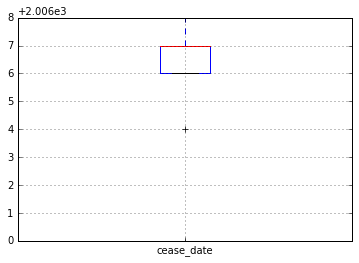

In [18]:
dete_resignations.boxplot(column='cease_date')

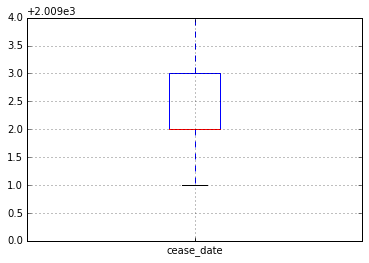

In [19]:
tafe_resignations.boxplot(column='cease_date')

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of *service*.

The **tafe_resignations** dataframe already contains a "service" column, which we renamed to *institute_service*. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in **dete_resignations**.

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [21]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [22]:
tafe_resignations['institute_service'].head()

3     NaN
4     3-4
5    7-10
6     3-4
7     3-4
Name: institute_service, dtype: object

In [23]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [45]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element is '-':
        return False
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False).copy()



/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
# tafe_resignations['dissatisfied'] = tafe_resignations.loc[:,['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].copy().any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
dete_resignations['dissatisfied'] = dete_resignations.loc[:,[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up.head()



id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                                                  -   

  Contributing Factors. Career Move - Private Sector   \
3                                                  -    
4                       Career Move - Private Sector    
5                                                  -    
6                       Career Move - Private Sector    
7                                                  -    

  Contributing Factors. Career Move - Self-employment  \
3                                                  -    
4                                                  -    
5                                                  -    
6                                                  -    
7                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
3                                -                                      -   
4                                -                                      -   
5                                -                                      -   
6                                -                       Maternity/Family   
7                                -                                      -   

      ...      Contributing Factors. Travel Contributing Factors. Other  \
3     ...                            Travel                           -   
4     ...                                 -                           -   
5     ...                                 -                       Other   
6     ...                                 -                       Other   
7     ...                                 -                       Other   

  Contributing Factors. NONE  gender            age    employment_status  \
3                          -     NaN            NaN                  NaN   
4                          -    Male         41  45  Permanent Full-time   
5                          -  Female    56 or older      Contract/casual   
6                          -    Male  20 or younger  Temporary Full-time   
7                          -    Male         46  50  Permanent Full-time   

                  position institute_service role_service dissatisfied  
3                      NaN               NaN          NaN        False  
4  Teacher (including LVT)               3-4          3-4        False  
5  Teacher (including LVT)              7-10         7-10        False  
6      Administration (AO)               3-4          3-4        False  
7  Teacher (including LVT)               3-4          3-4        False  

[5 rows x 24 columns]

To recap, we've accomplished the following:
* Renamed the columns
* Dropped any data not needed for out analysis
* Verified the quality of our data
* Created a new *institute_service* column
* Cleaned the *Contributing Factors* columns
* Created a new column indicating if employee resigned because they were dissatisfied is some way

Now, we finally ready to combine our datasets! Our goal is to aggregate the data according to the *institute_service* column, so when we combine the data, think about how to get the data into a form that's easy to aggragate.

In [40]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [54]:
combined.shape

(651, 53)

In [56]:
combined_updated = combined.dropna(axis=1, thresh=500)

In [58]:
combined_updated.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the *institute_service* column. This column is tricky to clean because it currently contains values in a couple different forms.

To analyze the data, we'll convert these number into categories. We'll base our analysis on [this artical](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions bellow:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Let's categorize the values in the *institute_service* column using the definitions above.

In [60]:
combined_updated.institute_service.astype(str)

3                   7.0
5                  18.0
8                   3.0
9                  15.0
11                  3.0
12                 14.0
14                  5.0
16                  nan
20                 30.0
21                 32.0
22                 15.0
23                 39.0
25                 17.0
27                  7.0
33                  9.0
34                  6.0
37                  1.0
39                  nan
40                 35.0
41                 38.0
42                  1.0
43                 36.0
48                  3.0
50                  3.0
51                 19.0
55                  4.0
57                  9.0
61                  1.0
69                  6.0
71                  1.0
             ...       
659                 1-2
660                 3-4
661                 5-6
665                 nan
666                 nan
669                 3-4
670                 nan
671    Less than 1 year
675    Less than 1 year
676                 1-2
677    Less than

In [73]:
combined_updated['institute_service_updated'] = combined_updated['institute_service'].astype('str').str.extract(r"(\d+)").copy()
combined_updated.institute_service_updated = combined_updated.institute_service_updated.astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
combined_updated.institute_service_updated.value_counts()

1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: institute_service, dtype: int64

In [77]:
def map_career(element):
    if pd.isnull(element):
        return np.nan
    elif element < 3:
        return 'New'
    elif element >= 3 and element <= 6:
        return 'Experienced'
    elif element >= 7 and element <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_updated'].astype(float).apply(map_career).copy()
combined_updated.service_cat.value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [78]:
combined_updated.dissatisfied.value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [82]:
combined_updated.dissatisfied = combined_updated.dissatisfied.fillna(False).copy()
combined_updated.dissatisfied.value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


False    411
True     240
Name: dissatisfied, dtype: int64

In [87]:
pv_table = combined_updated.pivot_table(index="service_cat", values="dissatisfied")
pv_table.head()

dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294

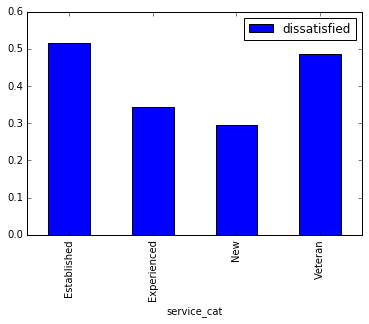

In [89]:
pv_table.plot(kind='bar')


In this project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:
* Explored the data and figured out how to prepare it for analysis
* Corrected some of the missing values
* Dropped any data not needed for our analysis
* Renamed our columns
* Verified the quality of our data
* Created a new *institute_service* column
* Cleaned the *Contributing Factors* columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way
* Combined the data
* Cleaned the *institute_service* column
* Handled the missing values in the *dissatisfied* column
* Aggregated the data

Our work here is far from done! But there are some of work that wa can continue with the following steps:
* Decide how to handle the rest of the missing values. Then, aggregate the data according to the *service_cat* column again. How many people in each career stage resigned due to some kind of dissatisfaction?
* Clean the *age* column. How many people in each age group resgined due to some kind of dissatisfaction?
* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
* 